In [92]:
# Import main libraries
import tensorflow as tf
from tensorflow import keras

# Import support libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Import
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam



# Tensorflow version
print(tf.__version__)

1.9.0


In [0]:
# Import fashion mnist dataset
fashion_mnist_data = keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, test_labels) = fashion_mnist_data.load_data()

In [52]:
# Check the shape of the data
print("Train input size: " + str(train_images.shape))
print("Train output size: " + str(train_lables.shape))
print("Test input size: " + str(test_images.shape))
print("Test output size: " + str(test_labels.shape))

Train input size: (60000, 28, 28)
Train output size: (60000,)
Test input size: (10000, 28, 28)
Test output size: (10000,)


In [0]:
# Dictionay for reference of classes
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

This images is classed as a: T-shirt/top


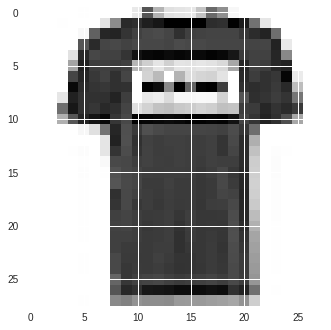

In [54]:
# See one of the images in the data set
plt.figure()
plt.imshow(train_images[1])
print("This images is classed as a: " + class_names[train_lables[1]])

In [0]:
# Normalise inout images pixels from between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0
  
# Reshape the images(28x28x1) to be fed into the convolution neural network
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)



In [64]:
# Represent category labels using one-hot codeing
one_hot_train_lables =  to_categorical(train_lables)
one_hot_test_lables = to_categorical(test_labels)

# Test the lables
print("Original Train Label for image 5: " + str(train_lables[5]))
print("One-Hot Train Label for image 5: " + str(one_hot_train_lables[5]))
print("Size of one_hot_train_lables: " + str(one_hot_train_lables.shape))

Original Train Label for image 5: 2
One-Hot Train Label for image 5: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Size of one_hot_train_lables: (60000, 10)


In [0]:
# Finally split the training data for 80/20 for training and validation
from sklearn.model_selection import train_test_split
train_x, validate_x, train_y, validate_y = train_test_split(train_images,
                                           one_hot_train_lables, test_size=0.2,
                                           random_state=42)

In [78]:
# Print sizes of the training and valdiationd data
train_x.shape, validate_x.shape, train_y.shape,validate_y.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

**Build the Network**

In [0]:
# Network parameters
batch_size = 256
epochs = 15
num_classes = 10


In [0]:
# CNN Model

model = Sequential()
# Conv Layer 1, uses kernel of 3x3 and 32 filters
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1),padding='same'))
# Pass them through Leaky ReLU activation
model.add(LeakyReLU(alpha=0.1))
# Max Pooling Layer 1
model.add(MaxPooling2D((2, 2),padding='same'))

# Conv Layer 2, uses kernel of 3x3 and 64 filters
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
# Max Pooling Layer 2
model.add(MaxPooling2D((2,2), padding='same'))
    
# Conv Layer 3, uses kernel of 3x3 and 128 filters
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
# Max Pooling Layer 3
model.add(MaxPooling2D((2,2), padding='same'))

# Flat Layer 1
model.add(Flatten())

# Densre Layer 1
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))

#Dense Output Layer
model.add(Dense(num_classes, activation='softmax'))


In [0]:
# Complie the model
model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer= Adam(),
                      metrics=['accuracy'])


In [106]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [107]:
fashion_model_train = model.fit(train_x, 
                          train_y, 
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(validate_x, validate_y))


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 7s 143us/step - loss: 0.6431 - acc: 0.7676 - val_loss: 0.4041 - val_acc: 0.8575
Epoch 2/15
48000/48000 [==============================] - 6s 131us/step - loss: 0.3527 - acc: 0.8743 - val_loss: 0.3196 - val_acc: 0.8843
Epoch 3/15
48000/48000 [==============================] - 6s 130us/step - loss: 0.3027 - acc: 0.8911 - val_loss: 0.2829 - val_acc: 0.8995
Epoch 4/15
16128/48000 [=========>....................] - ETA: 3s - loss: 0.2778 - acc: 0.9013

48000/48000 [==============================] - 6s 130us/step - loss: 0.2706 - acc: 0.9026 - val_loss: 0.2648 - val_acc: 0.9047
Epoch 5/15
48000/48000 [==============================] - 6s 127us/step - loss: 0.2490 - acc: 0.9108 - val_loss: 0.2545 - val_acc: 0.9075
Epoch 6/15
48000/48000 [==============================] - 6s 126us/step - loss: 0.2269 - acc: 0.9185 - val_loss: 0.2408 - val_acc: 0.9117
Epoch 7/15
40192/48000 [========================>.....] - ETA: 0s - loss: 0.2064 - acc: 0.9251

48000/48000 [==============================] - 6s 126us/step - loss: 0.2067 - acc: 0.9249 - val_loss: 0.2303 - val_acc: 0.9159
Epoch 8/15
48000/48000 [==============================] - 6s 126us/step - loss: 0.1940 - acc: 0.9288 - val_loss: 0.2491 - val_acc: 0.9059
Epoch 9/15
48000/48000 [==============================] - 6s 128us/step - loss: 0.1788 - acc: 0.9347 - val_loss: 0.2429 - val_acc: 0.9143
Epoch 10/15
44288/48000 [==========================>...] - ETA: 0s - loss: 0.1693 - acc: 0.9374

48000/48000 [==============================] - 6s 130us/step - loss: 0.1678 - acc: 0.9380 - val_loss: 0.2234 - val_acc: 0.9216
Epoch 11/15
48000/48000 [==============================] - 6s 127us/step - loss: 0.1519 - acc: 0.9449 - val_loss: 0.2211 - val_acc: 0.9188
Epoch 12/15
48000/48000 [==============================] - 6s 126us/step - loss: 0.1437 - acc: 0.9471 - val_loss: 0.2171 - val_acc: 0.9215
Epoch 13/15
44288/48000 [==========================>...] - ETA: 0s - loss: 0.1258 - acc: 0.9539

48000/48000 [==============================] - 6s 127us/step - loss: 0.1268 - acc: 0.9537 - val_loss: 0.2185 - val_acc: 0.9205
Epoch 14/15
48000/48000 [==============================] - 6s 127us/step - loss: 0.1158 - acc: 0.9572 - val_loss: 0.2435 - val_acc: 0.9140
Epoch 15/15
48000/48000 [==============================] - 6s 126us/step - loss: 0.1079 - acc: 0.9606 - val_loss: 0.2609 - val_acc: 0.9164


In [112]:
# Evalute the model on test data
test_eval = model.evaluate(test_images, one_hot_test_lables, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 128us/step
Test loss: 0.28578567612171174
Test accuracy: 0.9115


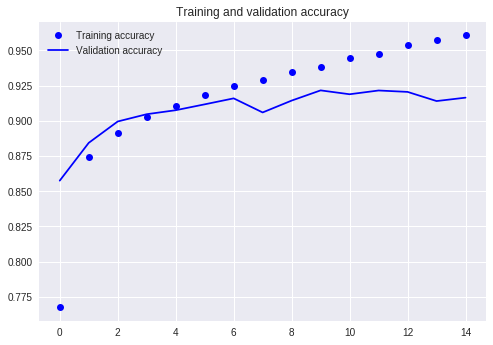

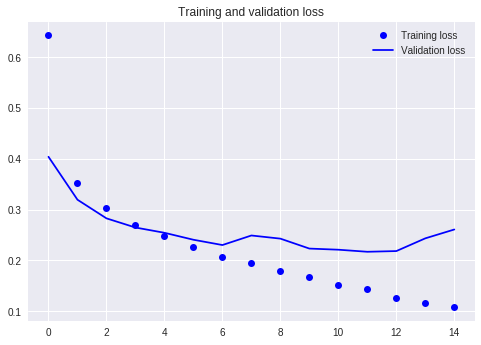

In [114]:
accuracy = fashion_model_train.history['acc']
val_accuracy = fashion_model_train.history['val_acc']
loss = fashion_model_train.history['loss']
val_loss = fashion_model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()